## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

### Explorando uma base de dados

Nesta atividade prática iremos explorar a seguinte base de dados **_Forest Cover Type_**

1. Obtenha esta base de dados no seguinte link: https://www.kaggle.com/uciml/forest-cover-type-dataset/download
2. Consulte a documentação oficial da base de dados: https://archive.ics.uci.edu/ml/datasets/covertype
3. **Responda**:  

    3.1 O que é cada exemplo na base de dados?  
    3.2 Em que ano ela foi obtida?  
    3.3 Quem foram os responsáveis pela criação desta base de dados?

### 3.1 O que é cada exemplo na base de dados?
> Atributos de lotes de terras com tamanho variando entre 2 e 80 hectares pertencentes
> às respectivas áreas da Floresta National Roosevel no Colorado do Norte:
> Rawah, Comanche Peak, Neota, Cache la Poudre. Cada observação possui um tipo de cobertura.
 > Cada exemplo da base de dados é uma observação de um lote destes.

### 3.2 Em que ano ela foi obtida?
> Esta base de dados foi obtida em 01/08/1998

### 3.3 Quem foram os responsáveis pela criação desta base de dados?
>   Esta base de dados foi derivada de dados espaciais digitais gerados pelo Serviço Florestal do Estados Unidos  (USFS)
>   e pela Pesquisa Geológica  dos Estados Unidos.
>   Os criadores desta base de dados foram:
>   1. Jock A. Blackard
>   2. Dr. Denis J. Dean
>   3. Dr. Charles W. Anderson.

In [1]:
import sys
import subprocess

def setup_packages():
    """
    Commands in console to install pip packages
    :return: void
    """
    packages = ["pandas", "matplotlib", "kaggle"]
    for package in packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    pass

# doing setup of project,
setup_packages()

In [2]:
# before run do the following:
# download token from your kaggle profile and put in to the
# folder ~/kaggle/kaggle.json on linux and
# in C:\Users<Windows-username>.kaggle\kaggle.json in Windows
# any doubts see for reference: https://www.kaggle.com/docs/api

from zipfile import ZipFile

def download_unzip_dataset():
    """
    Using kaggle api to download project dataset and zipfile module to unzip it
    :return: void
    """
    subprocess.check_call(["kaggle", "datasets", "download", "-d", "uciml/forest-cover-type-dataset"])
    with ZipFile('forest-cover-type-dataset.zip', 'r') as zipObj:
        zipObj.extractall("data")
    pass
download_unzip_dataset()

forest-cover-type-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
## Reservado para a importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re


### Manipulando a base de dados

1. Abra a base de dados com o pandas
2. Imprima os 10 primeiros exemplos pertencentes à esta base
3. Imprima os 10 últimos exemplos pertencentes à esta base
4. Quantos exemplos esta base de dados possui?
5. Quais são os atributos que a base de dados possui e quais seus tipos?
6. Há algum dado faltante na base?
7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?  
  7.1 Este atributo é quantitativo ou qualitativo?  
  7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:  
  * https://pbpython.com/categorical-encoding.html

### 1. Abra a base de dados com o pandas

In [4]:
data = pd.read_csv("data/covtype.csv")

### 2. Imprima os 10 primeiros exemplos pertencentes à esta base

In [5]:
data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


### 3. Imprima os 10 últimos exemplos pertencentes à esta base

In [6]:
data.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581002,2419,168,25,108,33,124,230,240,126,812,...,0,0,0,0,0,0,0,0,0,3
581003,2415,161,25,95,29,120,236,237,116,815,...,0,0,0,0,0,0,0,0,0,3
581004,2410,158,24,90,24,120,238,236,115,819,...,0,0,0,0,0,0,0,0,0,3
581005,2405,159,22,90,19,120,237,238,119,824,...,0,0,0,0,0,0,0,0,0,3
581006,2401,157,21,90,15,120,238,238,119,830,...,0,0,0,0,0,0,0,0,0,3
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


### 4. Quantos exemplos esta base de dados possui ?

In [7]:
print("A base de dados possui {} exemplos".format(len(data)))

A base de dados possui 581012 exemplos


### 5. Quais são os atributos que a base de dados possui e quais seus tipos ?

In [8]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

### 6. Há algum dado faltante na base?

In [9]:
answer = "Sim" if data.isnull().values.any() else "Não"
answer

'Não'

### 7. De acordo com a documentação da base de dados, qual o significado dos atributos do tipo "Soil Type"?
> São colunas binárias, que indicam a presença ou ausência de um tipo de solo

###  7.1 Este atributo é quantitativo ou qualitativo?
> Qualitativo

### 7.2 Qual o tipo de codificação utilizada para denotar este atributo? Consulte a seguinte referência:
  * https://pbpython.com/categorical-encoding.html

> a codificação utilizada é One Hot Encoding


### Visualizando a base de dados

1. Baseando-se nos fundamentos de visualização de dados abordados na disciplina, plote cada um dos atributos preditores de maneira a enfatizar a sua distribuição, tendência central e dispersão  
1.1 Considere que o número de columas no dataset é diferente do número de atributos, conforme discussão promovida a respeito do dataset  
1.2 Se preferir, opte por complementar as informações visuais com medidas estatísticas  
2. A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?  
3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)  
3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe

### 1 - Plot dos dados quantitativos e suas estatísticas

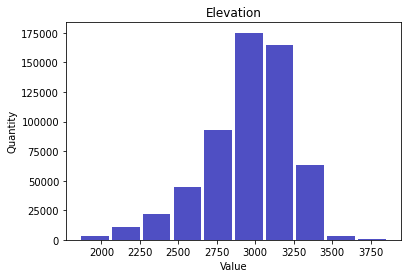

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64


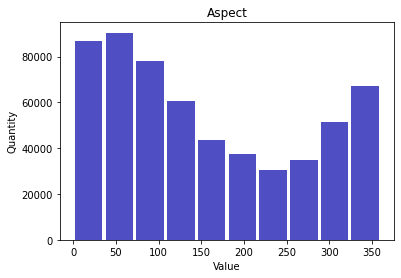

count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64


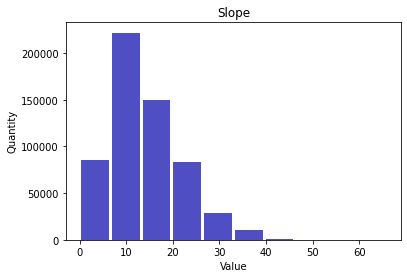

count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64


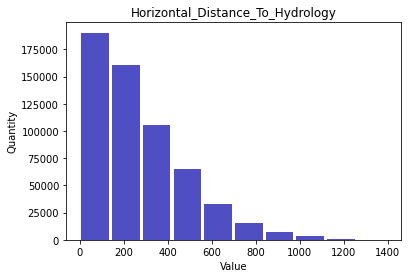

count    581012.000000
mean        269.428217
std         212.549356
min           0.000000
25%         108.000000
50%         218.000000
75%         384.000000
max        1397.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64


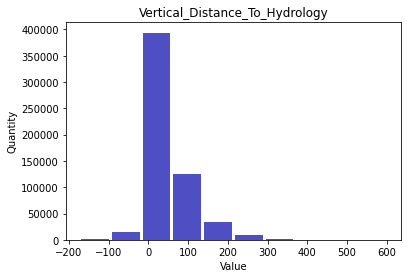

count    581012.000000
mean         46.418855
std          58.295232
min        -173.000000
25%           7.000000
50%          30.000000
75%          69.000000
max         601.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64


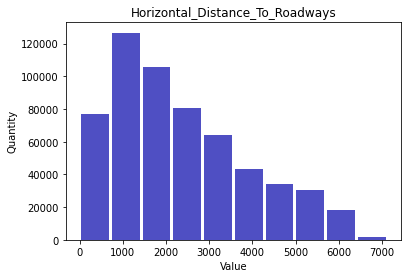

count    581012.000000
mean       2350.146611
std        1559.254870
min           0.000000
25%        1106.000000
50%        1997.000000
75%        3328.000000
max        7117.000000
Name: Horizontal_Distance_To_Roadways, dtype: float64


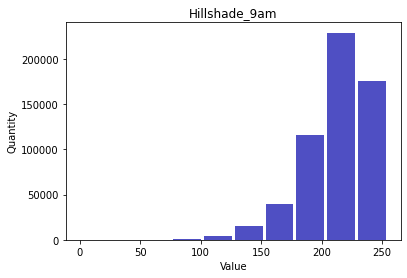

count    581012.000000
mean        212.146049
std          26.769889
min           0.000000
25%         198.000000
50%         218.000000
75%         231.000000
max         254.000000
Name: Hillshade_9am, dtype: float64


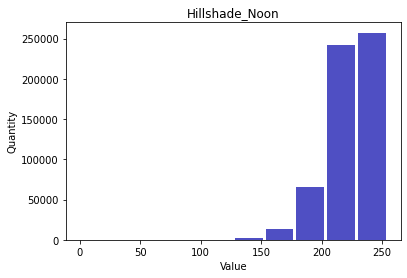

count    581012.000000
mean        223.318716
std          19.768697
min           0.000000
25%         213.000000
50%         226.000000
75%         237.000000
max         254.000000
Name: Hillshade_Noon, dtype: float64


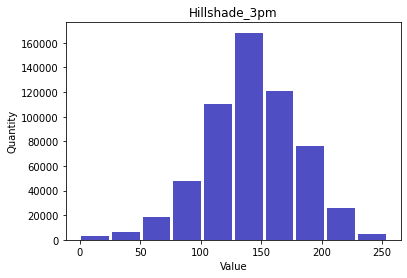

count    581012.000000
mean        142.528263
std          38.274529
min           0.000000
25%         119.000000
50%         143.000000
75%         168.000000
max         254.000000
Name: Hillshade_3pm, dtype: float64


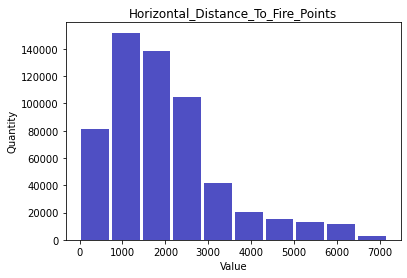

count    581012.000000
mean       1980.291226
std        1324.195210
min           0.000000
25%        1024.000000
50%        1710.000000
75%        2550.000000
max        7173.000000
Name: Horizontal_Distance_To_Fire_Points, dtype: float64


In [10]:
#plot first 10 columns with quantitative data and statistics
for i in range(10):
    series = data.iloc[:,i]
    plt.title(series.name)
    plt.hist(series, color='#0504aa',alpha=0.7, rwidth=0.9)
    plt.ylabel("Quantity")
    plt.xlabel("Value")
    plt.show()
    print(series.describe())

### Plot do primeiro dado categórico da base de dados "Wilderness_Area"

/tmp/ipykernel_73433/2420410488.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


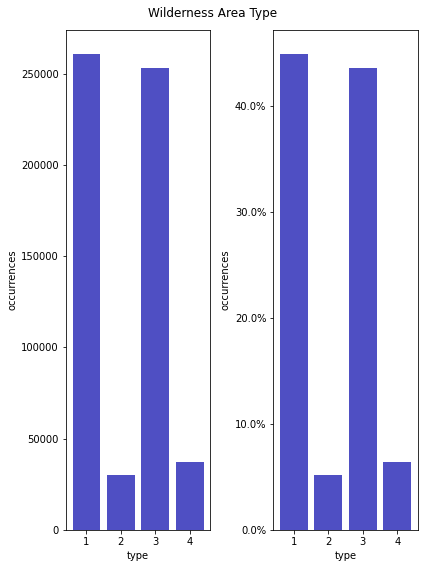

In [11]:
def plot_categorical_qtd_perc(df, x, y, title, height=6, width=8):
    plt_fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(height, width))
    plt.suptitle(title)
    x_series = df["{}".format(x)]
    y_series = df["{}".format(y)]
    axs[0].bar(x_series, y_series, color='#0504aa', alpha=0.7)
    axs[0].set_ylabel(y)
    axs[0].set_xlabel(x)
    normalized_series = y_series / y_series.sum()
    axs[1].bar(x_series, normalized_series * 100, color='#0504aa', alpha=0.7)
    axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
    axs[1].set_ylabel(y)
    axs[1].set_xlabel(x)
    return plt_fig, axs

bar_df = pd.DataFrame({
    'type' : ["1", "2", "3", "4"],
    'occurrences' : [data.Wilderness_Area1.sum(), data.Wilderness_Area2.sum(), data.Wilderness_Area3.sum(), data.Wilderness_Area4.sum()]
})

fig, axes = plot_categorical_qtd_perc(bar_df, "type", "occurrences", "Wilderness Area Type" )
fig.show()



### Plot do dado categórico da base de dados "Soil_Type"

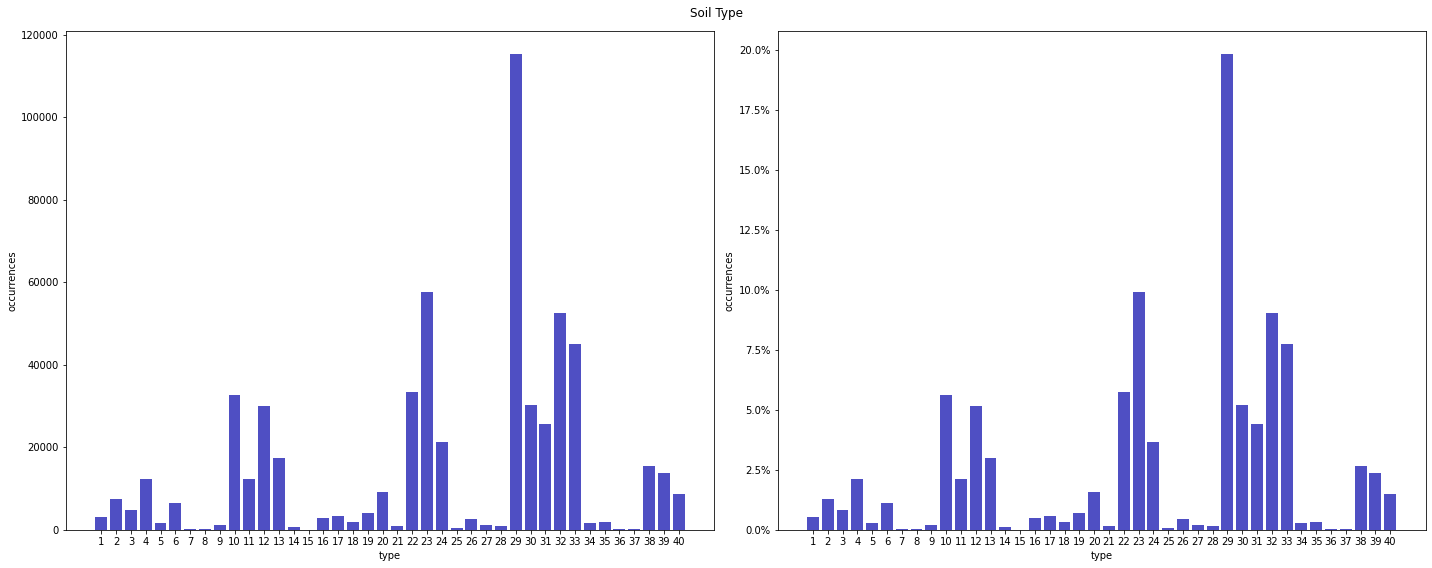

In [12]:
qtd_soil_types = []
labels = []

for i in range(14,54):
    series = data.iloc[:,i]
    qtd_soil_types.append(series.sum())
    number = re.findall(r'\d+', series.name)[-1]
    labels.append(number)

bar_df = pd.DataFrame({
    'type' : labels,
    'occurrences' : qtd_soil_types
})

fig, axs = plot_categorical_qtd_perc(bar_df, "type", "occurrences", "Soil Type", 20, 8)

### Plot do atributo alvo "Cover_Type"

(<Figure size 432x576 with 2 Axes>,
 array([<AxesSubplot:xlabel='type', ylabel='occurrences'>,
        <AxesSubplot:xlabel='type', ylabel='occurrences'>], dtype=object))

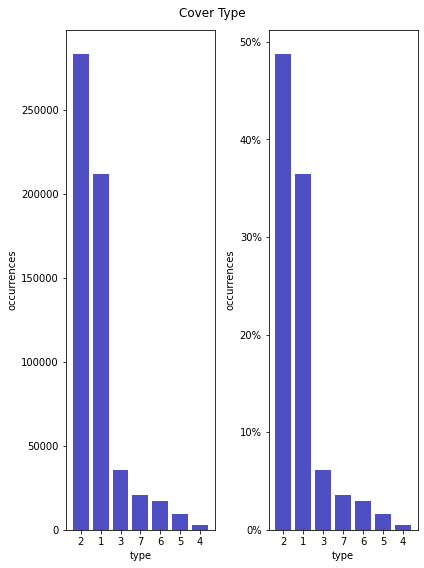

In [13]:
series = data["Cover_Type"].value_counts()
indexes = list(series.index)
indexes_str = []
for index in indexes:
    indexes_str.append(str(index))

value_counts = series.values

bar_df = pd.DataFrame({
    'type' : indexes_str,
    'occurrences' : value_counts
})

plot_categorical_qtd_perc(bar_df, "type", "occurrences", "Cover Type")


### 2 - A partir da visualização elaborada, o que pode-se dizer a respeito do balanceamento do atributo-alvo?
> Que as amostras por cada classe do atributo alvo não estão balanceadas, havendo uma diferença bastante significativa
> nas ocorrências de cada classe.

### 3. Que tipo de tarefa de Aprendizado de Máquina é sugestiva para este problema?
>   Tarefa de classificação do atributo "Cover_Type"


### 3.1 Apresente métricas de desempenho compatíveis para a avaliação do problema (liste-as)

### 3.2 Escolha uma das métricas apresentadas para ser utilizada como referência pela equipe